In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('reduced_var_data.csv', index_col = 0)
y = data['SalePrice']
x = data.drop(labels = 'SalePrice', axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

ss = StandardScaler()
ss.fit(x_train)
x_train = ss.transform(x_train)
x_test = ss.transform(x_test)

In [10]:
seed = 42
np.random.seed(seed)

n_feat = x.shape[1]
mdl = Sequential()
mdl.add(Dense(units=256, input_dim = n_feat, activation = 'relu'))
mdl.add(Dense(units=1, activation='linear'))

mdl.compile(loss='mean_squared_error', optimizer='adam', metrics= ['mse', 'mae'])
monitor = EarlyStopping(monitor= 'val_loss', min_delta=1e-3, 
                        patience = 10, verbose=1, mode = 'auto')
history = mdl.fit(x_train, y_train, validation_data = (x_test, y_test), 
                  callbacks=[monitor],batch_size= 64,epochs=5000,verbose=0)

y_pred = mdl.predict(x_test)
MSEscore = np.sqrt(mean_squared_error(y_pred, y_test))
print('Score RMSE = {}'.format(MSEscore))

MAEscore = np.sqrt(mean_absolute_error(y_pred, y_test))
print('Score RMAE = {}'.format(MAEscore))

mdl.summary()

Epoch 04090: early stopping
Score RMSE = 28756.550747346522
Score RMAE = 140.825115604183
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 256)               8192      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 257       
Total params: 8,449
Trainable params: 8,449
Non-trainable params: 0
_________________________________________________________________


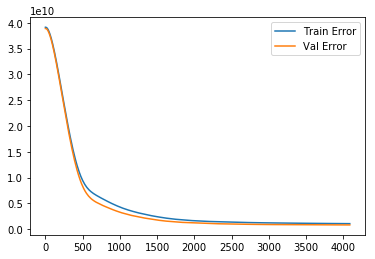

In [11]:
plt.figure()
plt.plot(history.epoch, history.history['mean_squared_error'], label = 'Train Error')
plt.plot(history.epoch, history.history['val_mean_squared_error'], label = 'Val Error')
plt.legend()

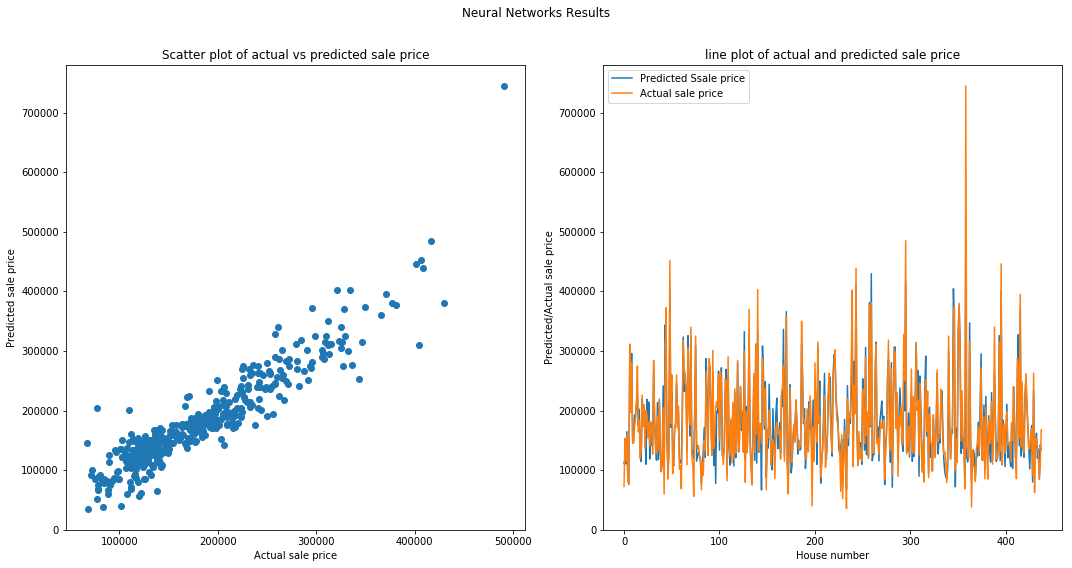

In [12]:
y_pred = mdl.predict(x_test)
fig = plt.figure(figsize=(15,8))
fig.suptitle('Neural Networks Results')
plt.subplot(121)
plt.scatter((y_pred), (y_test))
plt.xlabel('Actual sale price')
plt.ylabel('Predicted sale price')
plt.title('Scatter plot of actual vs predicted sale price')
plt.subplot(122)
plt.plot((y_pred), label='Predicted Ssale price')
plt.plot((y_test.values), label='Actual sale price')
plt.xlabel('House number')
plt.ylabel('Predicted/Actual sale price')
plt.title('line plot of actual and predicted sale price')
plt.legend()
plt.tight_layout()
fig.subplots_adjust(top=0.88)